In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv('cars-uci.csv',delimiter=';')
#eliminando linhas com missings
df=df.dropna()

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    int64  
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    int64  
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 30.6+ KB


In [5]:
#definindo as dimensões do para clustering
mpg=np.array(df['mpg'])
hp=np.array(df['horsepower'])
w=np.array(df['weight'])

In [6]:
#simples verificação
hp[0]

130.0

Standardization das features

In [7]:
mpgm,mpgdp=mpg.mean(),mpg.std()

In [8]:
hpm,hpdp=hp.mean(),hp.std()

In [9]:
wm,wdp=df['weight'].mean(),df['weight'].std()

In [10]:
XS=np.zeros((len(mpg),3)) # np.zeros vai criar uma array de 'len(mpg)' linhas por 
                          # colunas. A array é retornada para Xs
len(mpg), XS

(392,
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [11]:
# XS recebe os valores standardizados das features mp, hp e w, respectivamente
XS[:,0]=(mpg-mpgm)/mpgdp
XS[:,1]=(hp-hpm)/hpdp
XS[:,2]=(w-wm)/wdp
XS

array([[-0.69863841,  0.66413273,  0.61974833],
       [-1.08349824,  1.57459447,  0.84225766],
       [-0.69863841,  1.18439658,  0.53969206],
       ...,
       [ 1.09737414, -0.53247413, -0.80360505],
       [ 0.5842277 , -0.66254009, -0.41509668],
       [ 0.96908753, -0.58450051, -0.30325336]])

Fazer kmeans para k de 2 a 8<br/>
Traçar a curva do cotovelo<br/>
Escolher um K<br/>
Pegar 20 amostras de cada cluster e "explicá-las" (Storytelling)<br/>


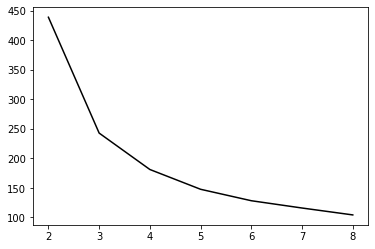

In [12]:
lk = [k for k in range(2,9)]
# for k in range(2,9):lk.append(k)
li = []
for i in range(2,9):
    km = KMeans(n_clusters=i)
    km.fit(XS)
    li.append(km.inertia_)
plt.plot(lk, li, color='black')
plt.show()

À partir da curva do cotovelo, entendo que o melhor K seja 3

In [13]:
km = KMeans(n_clusters=3)
km.fit(XS)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
km.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [15]:
df['Cluster'] = km.labels_

In [16]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Cluster
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,1
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,2
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,2
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,2
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,2
5,15.0,8,4290,198.0,4341,100,70,1,ford galaxie 500,2
6,14.0,8,4540,220.0,4354,90,70,1,chevrolet impala,2
7,14.0,8,4400,215.0,4312,85,70,1,plymouth fury iii,2
8,14.0,8,4550,225.0,4425,100,70,1,pontiac catalina,2
9,15.0,8,3900,190.0,3850,85,70,1,amc ambassador dpl,2


In [17]:
df[df['Cluster']==0].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Cluster
24,27.0,4,9700,88.0,2130,145,70,3,datsun pl510,0
25,26.0,4,9700,46.0,1835,205,70,2,volkswagen 1131 deluxe sedan,0
35,27.0,4,9700,88.0,2130,145,71,3,datsun pl510,0
36,28.0,4,1400,90.0,2264,155,71,1,chevrolet vega 2300,0
57,28.0,4,1160,90.0,2123,140,71,2,opel 1900,0
58,30.0,4,7900,70.0,2074,195,71,2,peugeot 304,0
59,30.0,4,8800,76.0,2065,145,71,2,fiat 124b,0
60,31.0,4,7100,65.0,1773,190,71,3,toyota corolla 1200,0
61,35.0,4,7200,69.0,1613,180,71,3,datsun 1200,0
62,27.0,4,9700,60.0,1834,190,71,2,volkswagen model 111,0


In [18]:
df[df['Cluster']==1].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Cluster
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,1
20,24.0,4,1130,95.0,2372,150,70,3,toyota corona mark ii,1
21,22.0,6,1980,95.0,2833,155,70,1,plymouth duster,1
22,18.0,6,1990,97.0,2774,155,70,1,amc hornet,1
23,21.0,6,2000,85.0,2587,160,70,1,ford maverick,1
26,25.0,4,1100,87.0,2672,175,70,2,peugeot 504,1
27,24.0,4,1070,90.0,2430,145,70,2,audi 100 ls,1
28,25.0,4,1040,95.0,2375,175,70,2,saab 99e,1
29,26.0,4,1210,113.0,2234,125,70,2,bmw 2002,1
30,21.0,6,1990,90.0,2648,150,70,1,amc gremlin,1


In [19]:
df[df['Cluster']==2].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Cluster
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,2
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,2
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,2
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,2
5,15.0,8,4290,198.0,4341,100,70,1,ford galaxie 500,2
6,14.0,8,4540,220.0,4354,90,70,1,chevrolet impala,2
7,14.0,8,4400,215.0,4312,85,70,1,plymouth fury iii,2
8,14.0,8,4550,225.0,4425,100,70,1,pontiac catalina,2
9,15.0,8,3900,190.0,3850,85,70,1,amc ambassador dpl,2
15,15.0,8,3830,170.0,3563,100,70,1,dodge challenger se,2


  Partindo da análise dos Clusters podemos observar que os carros ficam bem divididos de acordo com algumas características preponderantes. Para a análise aqui proposta, trago 
duas destas características:

    * Gráfico 1 (horsepower x weigth): No primeiro gráfico pode-se observar como estão
    bem definidos os clusters, onde quão maior a potência (horsepower) maior o peso 
    do carro (weigth)
    * Gráfico 2 (mpg x weigth): No gráfico 2 é demonstrado quanto o consumo (miles 
    per galon) está diretamente ligado com o peso do carro. Mais uma vez, os cluster
    são bem definidos e mostram de maneira exato a relação peso x consumo.

  As listas de clusters acima também demonstram tal separação por clusters e servem como referencial para os gráficos aqui apresentados.
    

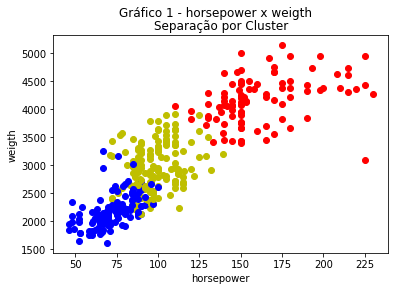

In [42]:
cor = ['bo', 'yo', 'ro']

for i in range(len(df)):
    plt.plot(df.iloc[i,3], df.iloc[i,4], cor[df.iloc[i,9]])
    
plt.title("Separação por Cluster")
plt.suptitle("Gráfico 1 - horsepower x weigth")
plt.xlabel("horsepower")
plt.ylabel("weigth")
plt.show()

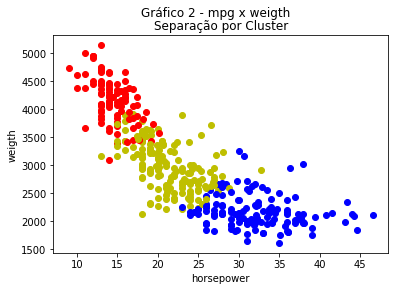

In [43]:
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,4], cor[df.iloc[i,9]])
    
plt.title("Separação por Cluster")
plt.suptitle("Gráfico 2 - mpg x weigth")
plt.xlabel("horsepower")
plt.ylabel("weigth")
plt.show()